# Intaking CMIP6

## Investigate the Pangeo catalogue

In [2]:
from intake import open_catalog

cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/master.yaml")
# list(cat)


['ocean', 'atmosphere', 'climate', 'hydro']

In [4]:
import pprint
uni_dict = cat["climate"]["cmip6_gcs"].unique(["source_id"])
cat["climate"]["cmip6_gcs"].unique(["source_id"])["source_id"]["values"]
pprint.pprint(uni_dict["source_id"]["values"], compact=True)

['MCM-UA-1-0', 'E3SM-1-1-ECA', 'FGOALS-g3', 'SAM0-UNICON', 'E3SM-1-0',
 'EC-Earth3-CC', 'IPSL-CM6A-LR', 'GISS-E2-1-G-CC', 'CESM2', 'AWI-ESM-1-1-LR',
 'GISS-E2-2-G', 'KACE-1-0-G', 'ACCESS-CM2', 'CMCC-ESM2', 'GFDL-ESM4',
 'E3SM-1-1', 'CESM2-WACCM', 'CIESM', 'CNRM-CM6-1', 'EC-Earth3-Veg-LR',
 'EC-Earth3', 'CESM2-WACCM-FV2', 'MPI-ESM1-2-LR', 'CMCC-CM2-HR4',
 'MRI-AGCM3-2-S', 'EC-Earth3-Veg', 'HadGEM3-GC31-HM', 'IPSL-CM6A-ATM-HR',
 'MIROC-ES2L', 'GFDL-OM4p5B', 'BCC-ESM1', 'CESM1-WACCM-SC', 'TaiESM1',
 'CESM1-1-CAM5-CMIP5', 'GFDL-CM4', 'IPSL-CM5A2-INCA', 'MPI-ESM1-2-XR',
 'CMCC-CM2-SR5', 'CAMS-CSM1-0', 'ECMWF-IFS-LR', 'INM-CM5-H', 'BCC-CSM2-MR',
 'EC-Earth3P-VHR', 'NorESM2-MM', 'EC-Earth3P-HR', 'NESM3', 'IITM-ESM',
 'GFDL-ESM2M', 'CNRM-ESM2-1', 'CESM2-FV2', 'HadGEM3-GC31-LM', 'CanESM5',
 'EC-Earth3-AerChem', 'MPI-ESM-1-2-HAM', 'GISS-E2-1-H', 'BCC-CSM2-HR',
 'FIO-ESM-2-0', 'INM-CM4-8', 'CAS-ESM2-0', 'MRI-ESM2-0', 'CanESM5-CanOE',
 'GISS-E2-1-G', 'MPI-ESM1-2-HR', 'CMCC-CM2-VHR4', 'GFDL-CM4C192

In [22]:
import pprint

uni_dict = cat["climate"]["cmip6_gcs"].unique(["source_id", "experiment_id", "table_id"])
pprint.pprint(uni_dict, compact=True)

{'experiment_id': {'count': 168,
                   'values': ['piClim-2xDMS', 'ssp245-stratO3', 'histSST-piO3',
                              'piSST-pdSIC', 'piClim-4xCO2', '1pctCO2-cdr',
                              'esm-ssp585', 'hist-1950', 'abrupt-solm4p',
                              'histSST-piCH4', 'hist-1950HC', 'ssp245-nat',
                              'piClim-NOx', 'piClim-histnat', 'faf-heat-NA0pct',
                              'pdSST-futOkhotskSIC', 'aqua-p4K',
                              'ssp370SST-lowNTCF', 'amip', 'historical',
                              'ssp245-cov-modgreen', 'pdSST-futBKSeasSIC',
                              'faf-water', 'land-hist', 'amip-lwoff',
                              'dcppC-ipv-NexTrop-neg', 'hist-sol', 'faf-all',
                              'dcppC-amv-neg', 'esm-piControl-spinup',
                              'hist-totalO3', 'pa-futAntSIC', 'piClim-2xdust',
                              'abrupt-4xCO2', 'piClim-aer', 'past1000

In [2]:
# Define our query
query = dict(
    variable_id=["ts"],
    experiment_id=["historical"],#, "ssp585"],
    table_id=["Amon"],
    institution_id=["NOAA-GFDL"],
)

In [3]:
ts = cat["climate"]["cmip6_gcs"].search(**query)

In [4]:
ds_d = ts.to_dataset_dict(zarr_kwargs={"consolidated": True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [5]:
ds_d

{'CMIP.NOAA-GFDL.GFDL-ESM4.historical.Amon.gr1': <xarray.Dataset>
 Dimensions:    (bnds: 2, lat: 180, lon: 288, member_id: 3, time: 1980)
 Coordinates:
   * bnds       (bnds) float64 1.0 2.0
   * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
     lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
   * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
     lon_bnds   (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
   * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
     time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
   * member_id  (member_id) <U8 'r3i1p1f1' 'r2i1p1f1' 'r1i1p1f1'
 Data variables:
     ts         (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 423, 180, 288), meta=np.ndarray>
 Attributes:
     history:                 File was processed by fremetar (GFDL analog of C...
     activity_id:             CMIP


In [44]:
for key in ds_d:
    print(key)

CMIP.NOAA-GFDL.GFDL-ESM4.historical.Amon.gr1
CMIP.NOAA-GFDL.GFDL-CM4.historical.Amon.gr1


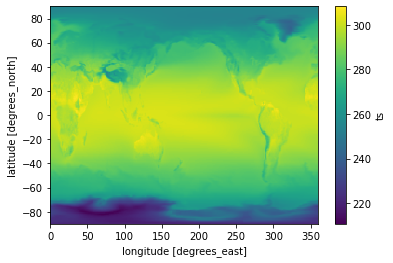

In [50]:
ds_d["CMIP.NOAA-GFDL.GFDL-ESM4.historical.Amon.gr1"].sel(time=slice("1958", "2014")).mean("member_id").mean("time").ts.plot()

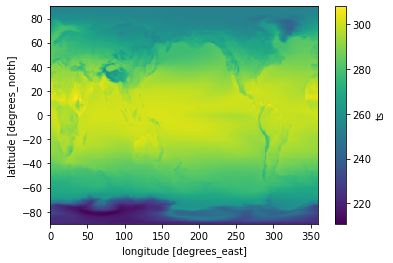

In [51]:
ds_d["CMIP.NOAA-GFDL.GFDL-CM4.historical.Amon.gr1"].sel(time=slice("1958", "2014")).mean("member_id").mean("time").ts.plot()

In [6]:
for k, ds in ds_d.items():
    print(f"dataset key={k}\n\tdimensions={sorted(list(ds.dims))}\n")

dataset key=CMIP.NOAA-GFDL.GFDL-ESM4.historical.Amon.gr1
	dimensions=['bnds', 'lat', 'lon', 'member_id', 'time']

dataset key=CMIP.NOAA-GFDL.GFDL-CM4.historical.Amon.gr1
	dimensions=['bnds', 'lat', 'lon', 'member_id', 'time']



## CMIP6 preprocessing testing

In [4]:
from cmip6_preprocessing.preprocessing import rename_cmip6
import dask

In [5]:
cmip6 = cat["climate"]["cmip6_gcs"]

# load a few models to illustrate the problem
query = dict(experiment_id=['piControl'], table_id='Amon',
             variable_id='vas', grid_label=['gn', 'gr'],
             source_id=['IPSL-CM6A-LR']
            )
cmip6_subset = cmip6.search(**query)

cmip6_subset.df['source_id'].unique()
z_kwargs = {'consolidated': True, 'decode_times':False}

with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    dset_dict = cmip6_subset.to_dataset_dict(zarr_kwargs=z_kwargs)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [13]:
coords = [c for c in dset_dict['CMIP.IPSL.IPSL-CM6A-LR.piControl.Amon.gr'].coords]

['time', 'height', 'lat', 'lon', 'time_bounds', 'member_id']

In [12]:
# IPSL data is a bit of a mess
ds = dset_dict['CMIP.IPSL.IPSL-CM6A-LR.piControl.Oyr.gn']
ds = rename_cmip6(ds)
ds

<xarray.Dataset>
Dimensions:      (bnds: 2, lev: 75, member_id: 1, time: 250, vertex: 4, x: 362, y: 332)
Coordinates:
    lat_bounds   (y, x, vertex) float32 dask.array<chunksize=(332, 362, 4), meta=np.ndarray>
    lon_bounds   (y, x, vertex) float32 dask.array<chunksize=(332, 362, 4), meta=np.ndarray>
    lat          (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
    lon          (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
  * lev          (lev) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    lev_bounds   (lev, bnds) float32 dask.array<chunksize=(75, 2), meta=np.ndarray>
  * time         (time) int64 0 8760 17532 26304 ... 2165184 2173944 2182704
    time_bounds  (time, bnds) float64 dask.array<chunksize=(250, 2), meta=np.ndarray>
  * member_id    (member_id) <U8 'r1i2p1f1'
Dimensions without coordinates: bnds, vertex, x, y
Data variables:
    area         (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
    o2           (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 9, 75, 332, 362), meta=np.ndarray>
Attributes:
    CMIP6_CV_version:        cv=6.2.15.1
    Conventions:             CF-1.7 CMIP-6.2
    EXPID:                   piControl
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    0.0
    branch_time_in_parent:   36524.0
    contact:                 ipsl-cmip6@listes.ipsl.fr
    creation_date:           2019-02-11T12:01:20Z
    data_specs_version:      01.00.28
    description:             DECK: control
    dr2xml_md5sum:           c2dce418e78ca835be1e2ff817c2c403
    dr2xml_version:          1.16
    experiment:              pre-industrial control
    experiment_id:           piControl
    external_variables:      areacello volcello
    forcing_index:           1
    frequency:               yr
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-C...
    grid:                    native ocean tri-polar grid with 105 k ocean cells
    grid_label:              gn
    history:                 none
    initialization_index:    2
    institution:             Institut Pierre Simon Laplace, Paris 75252, France
    institution_id:          IPSL
    license:                 CMIP6 model data produced by IPSL is licensed un...
    mip_era:                 CMIP6
    model_version:           6.1.8
    name:                    /ccc/work/cont003/gencmip6/lebasn/IGCM_OUT/IPSLC...
    nominal_resolution:      100 km
    parent_activity_id:      CMIP
    parent_experiment_id:    piControl-spinup
    parent_mip_era:          CMIP6
    parent_source_id:        IPSL-CM6A-LR
    parent_time_units:       days since 1750-01-01 00:00:00
    parent_variant_label:    r1i2p1f1
    physics_index:           1
    product:                 model-output
    realization_index:       1
    realm:                   ocnBgchem
    source:                  IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 14...
    source_id:               IPSL-CM6A-LR
    source_type:             AOGCM BGC
    sub_experiment:          none
    sub_experiment_id:       none
    table_id:                Oyr
    title:                   IPSL-CM6A-LR model output prepared for CMIP6 / C...
    tracking_id:             hdl:21.14100/5fb53c12-afe1-499d-9039-590b6e6b150...
    variable_id:             o2
    variant_info:            Equivalent to r1i1p1f1 but started on a differen...
    variant_label:           r1i2p1f1
    status:                  2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:     hdl:21.14100/5fb53c12-afe1-499d-9039-590b6e6b150...
    version_id:              v20190319
    intake_esm_varname:      ['o2']
    intake_esm_dataset_key:  CMIP.IPSL.IPSL-CM6A-LR.piControl.Oyr.gn

In [14]:
from cmip6_preprocessing.preprocessing import promote_empty_dims, broadcast_lonlat, replace_x_y_nominal_lat_lon

# check out the previous datasets
ds = dset_dict['CMIP.IPSL.IPSL-CM6A-LR.piControl.Oyr.gn']
ds

<xarray.Dataset>
Dimensions:         (axis_nbounds: 2, member_id: 1, nvertex: 4, olevel: 75, time: 250, x: 362, y: 332)
Coordinates:
    bounds_nav_lat  (y, x, nvertex) float32 dask.array<chunksize=(332, 362, 4), meta=np.ndarray>
    bounds_nav_lon  (y, x, nvertex) float32 dask.array<chunksize=(332, 362, 4), meta=np.ndarray>
    nav_lat         (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
    nav_lon         (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
  * olevel          (olevel) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    olevel_bounds   (olevel, axis_nbounds) float32 dask.array<chunksize=(75, 2), meta=np.ndarray>
  * time            (time) int64 0 8760 17532 26304 ... 2165184 2173944 2182704
    time_bounds     (time, axis_nbounds) float64 dask.array<chunksize=(250, 2), meta=np.ndarray>
  * member_id       (member_id) <U8 'r1i2p1f1'
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    area            (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
    o2              (member_id, time, olevel, y, x) float32 dask.array<chunksize=(1, 9, 75, 332, 362), meta=np.ndarray>
Attributes:
    CMIP6_CV_version:        cv=6.2.15.1
    Conventions:             CF-1.7 CMIP-6.2
    EXPID:                   piControl
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    0.0
    branch_time_in_parent:   36524.0
    contact:                 ipsl-cmip6@listes.ipsl.fr
    creation_date:           2019-02-11T12:01:20Z
    data_specs_version:      01.00.28
    description:             DECK: control
    dr2xml_md5sum:           c2dce418e78ca835be1e2ff817c2c403
    dr2xml_version:          1.16
    experiment:              pre-industrial control
    experiment_id:           piControl
    external_variables:      areacello volcello
    forcing_index:           1
    frequency:               yr
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-C...
    grid:                    native ocean tri-polar grid with 105 k ocean cells
    grid_label:              gn
    history:                 none
    initialization_index:    2
    institution:             Institut Pierre Simon Laplace, Paris 75252, France
    institution_id:          IPSL
    license:                 CMIP6 model data produced by IPSL is licensed un...
    mip_era:                 CMIP6
    model_version:           6.1.8
    name:                    /ccc/work/cont003/gencmip6/lebasn/IGCM_OUT/IPSLC...
    nominal_resolution:      100 km
    parent_activity_id:      CMIP
    parent_experiment_id:    piControl-spinup
    parent_mip_era:          CMIP6
    parent_source_id:        IPSL-CM6A-LR
    parent_time_units:       days since 1750-01-01 00:00:00
    parent_variant_label:    r1i2p1f1
    physics_index:           1
    product:                 model-output
    realization_index:       1
    realm:                   ocnBgchem
    source:                  IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 14...
    source_id:               IPSL-CM6A-LR
    source_type:             AOGCM BGC
    sub_experiment:          none
    sub_experiment_id:       none
    table_id:                Oyr
    title:                   IPSL-CM6A-LR model output prepared for CMIP6 / C...
    tracking_id:             hdl:21.14100/5fb53c12-afe1-499d-9039-590b6e6b150...
    variable_id:             o2
    variant_info:            Equivalent to r1i1p1f1 but started on a differen...
    variant_label:           r1i2p1f1
    status:                  2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:     hdl:21.14100/5fb53c12-afe1-499d-9039-590b6e6b150...
    version_id:              v20190319
    intake_esm_varname:      ['o2']
    intake_esm_dataset_key:  CMIP.IPSL.IPSL-CM6A-LR.piControl.Oyr.gn

In [15]:
ds = promote_empty_dims(ds)
ds

<xarray.Dataset>
Dimensions:         (axis_nbounds: 2, member_id: 1, nvertex: 4, olevel: 75, time: 250, x: 362, y: 332)
Coordinates:
    bounds_nav_lat  (y, x, nvertex) float32 dask.array<chunksize=(332, 362, 4), meta=np.ndarray>
    bounds_nav_lon  (y, x, nvertex) float32 dask.array<chunksize=(332, 362, 4), meta=np.ndarray>
    nav_lat         (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
    nav_lon         (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
  * olevel          (olevel) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    olevel_bounds   (olevel, axis_nbounds) float32 dask.array<chunksize=(75, 2), meta=np.ndarray>
  * time            (time) int64 0 8760 17532 26304 ... 2165184 2173944 2182704
    time_bounds     (time, axis_nbounds) float64 dask.array<chunksize=(250, 2), meta=np.ndarray>
  * member_id       (member_id) <U8 'r1i2p1f1'
  * axis_nbounds    (axis_nbounds) int64 0 1
  * nvertex         (nvertex) int64 0 1 2 3
  * x               (x) int64 0 1 2 3 4 5 6 7 ... 355 356 357 358 359 360 361
  * y               (y) int64 0 1 2 3 4 5 6 7 ... 325 326 327 328 329 330 331
Data variables:
    area            (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
    o2              (member_id, time, olevel, y, x) float32 dask.array<chunksize=(1, 9, 75, 332, 362), meta=np.ndarray>
Attributes:
    CMIP6_CV_version:        cv=6.2.15.1
    Conventions:             CF-1.7 CMIP-6.2
    EXPID:                   piControl
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    0.0
    branch_time_in_parent:   36524.0
    contact:                 ipsl-cmip6@listes.ipsl.fr
    creation_date:           2019-02-11T12:01:20Z
    data_specs_version:      01.00.28
    description:             DECK: control
    dr2xml_md5sum:           c2dce418e78ca835be1e2ff817c2c403
    dr2xml_version:          1.16
    experiment:              pre-industrial control
    experiment_id:           piControl
    external_variables:      areacello volcello
    forcing_index:           1
    frequency:               yr
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-C...
    grid:                    native ocean tri-polar grid with 105 k ocean cells
    grid_label:              gn
    history:                 none
    initialization_index:    2
    institution:             Institut Pierre Simon Laplace, Paris 75252, France
    institution_id:          IPSL
    license:                 CMIP6 model data produced by IPSL is licensed un...
    mip_era:                 CMIP6
    model_version:           6.1.8
    name:                    /ccc/work/cont003/gencmip6/lebasn/IGCM_OUT/IPSLC...
    nominal_resolution:      100 km
    parent_activity_id:      CMIP
    parent_experiment_id:    piControl-spinup
    parent_mip_era:          CMIP6
    parent_source_id:        IPSL-CM6A-LR
    parent_time_units:       days since 1750-01-01 00:00:00
    parent_variant_label:    r1i2p1f1
    physics_index:           1
    product:                 model-output
    realization_index:       1
    realm:                   ocnBgchem
    source:                  IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 14...
    source_id:               IPSL-CM6A-LR
    source_type:             AOGCM BGC
    sub_experiment:          none
    sub_experiment_id:       none
    table_id:                Oyr
    title:                   IPSL-CM6A-LR model output prepared for CMIP6 / C...
    tracking_id:             hdl:21.14100/5fb53c12-afe1-499d-9039-590b6e6b150...
    variable_id:             o2
    variant_info:            Equivalent to r1i1p1f1 but started on a differen...
    variant_label:           r1i2p1f1
    status:                  2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:     hdl:21.14100/5fb53c12-afe1-499d-9039-590b6e6b150...
    version_id:              v20190319
    intake_esm_varname:      ['o2']
    intake_esm_dataset_key:  CMIP

In [24]:
ds = broadcast_lonlat(ds)
ds = replace_x_y_nominal_lat_lon(ds)
ds

<xarray.Dataset>
Dimensions:         (axis_nbounds: 2, member_id: 1, nvertex: 4, olevel: 75, time: 250, x: 362, y: 332)
Coordinates:
    bounds_nav_lat  (y, x, nvertex) float32 dask.array<chunksize=(332, 362, 4), meta=np.ndarray>
    bounds_nav_lon  (y, x, nvertex) float32 dask.array<chunksize=(332, 362, 4), meta=np.ndarray>
    nav_lat         (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
    nav_lon         (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
  * olevel          (olevel) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    olevel_bounds   (olevel, axis_nbounds) float32 dask.array<chunksize=(75, 2), meta=np.ndarray>
  * time            (time) int64 0 8760 17532 26304 ... 2165184 2173944 2182704
    time_bounds     (time, axis_nbounds) float64 dask.array<chunksize=(250, 2), meta=np.ndarray>
  * member_id       (member_id) <U8 'r1i2p1f1'
  * axis_nbounds    (axis_nbounds) int64 0 1
  * nvertex         (nvertex) int64 0 1 2 3
  * x               (x) int64 0 1 2 3 4 5 6 7 ... 355 356 357 358 359 360 361
  * y               (y) float64 0.0 1.0 2.0 3.0 4.0 ... 328.0 329.0 330.0 331.0
    lon             (x, y) int64 0 0 0 0 0 0 0 0 ... 361 361 361 361 361 361 361
    lat             (x, y) int64 0 1 2 3 4 5 6 7 ... 325 326 327 328 329 330 331
Data variables:
    area            (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
    o2              (member_id, time, olevel, y, x) float32 dask.array<chunksize=(1, 9, 75, 332, 362), meta=np.ndarray>
Attributes:
    CMIP6_CV_version:        cv=6.2.15.1
    Conventions:             CF-1.7 CMIP-6.2
    EXPID:                   piControl
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    0.0
    branch_time_in_parent:   36524.0
    contact:                 ipsl-cmip6@listes.ipsl.fr
    creation_date:           2019-02-11T12:01:20Z
    data_specs_version:      01.00.28
    description:             DECK: control
    dr2xml_md5sum:           c2dce418e78ca835be1e2ff817c2c403
    dr2xml_version:          1.16
    experiment:              pre-industrial control
    experiment_id:           piControl
    external_variables:      areacello volcello
    forcing_index:           1
    frequency:               yr
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-C...
    grid:                    native ocean tri-polar grid with 105 k ocean cells
    grid_label:              gn
    history:                 none
    initialization_index:    2
    institution:             Institut Pierre Simon Laplace, Paris 75252, France
    institution_id:          IPSL
    license:                 CMIP6 model data produced by IPSL is licensed un...
    mip_era:                 CMIP6
    model_version:           6.1.8
    name:                    /ccc/work/cont003/gencmip6/lebasn/IGCM_OUT/IPSLC...
    nominal_resolution:      100 km
    parent_activity_id:      CMIP
    parent_experiment_id:    piControl-spinup
    parent_mip_era:          CMIP6
    parent_source_id:        IPSL-CM6A-LR
    parent_time_units:       days since 1750-01-01 00:00:00
    parent_variant_label:    r1i2p1f1
    physics_index:           1
    product:                 model-output
    realization_index:       1
    realm:                   ocnBgchem
    source:                  IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 14...
    source_id:               IPSL-CM6A-LR
    source_type:             AOGCM BGC
    sub_experiment:          none
    sub_experiment_id:       none
    table_id:                Oyr
    title:                   IPSL-CM6A-LR model output prepared for CMIP6 / C...
    tracking_id:             hdl:21.14100/5fb53c12-afe1-499d-9039-590b6e6b150...
    variable_id:             o2
    variant_info:            Equivalent to r1i1p1f1 but started on a differen...
    variant_label:           r1i2p1f1
    status:                  2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids: 

In [22]:
ds["o2"].isel(time=200, olevel=0).plot()#.sel(nav_lat=slice(-40, 40)).plot()

ValueError: dimensions or multi-index levels ['nav_lat'] do not exist

In [25]:
def wrapper(ds):
    ds = ds.copy()
    ds = rename_cmip6(ds)
    ds = promote_empty_dims(ds)
    ds = broadcast_lonlat(ds)
    ds = replace_x_y_nominal_lat_lon(ds)
    return ds

# pass the preprocessing directly
with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    dset_dict_processed1 = cmip6_subset.to_dataset_dict(zarr_kwargs=z_kwargs,
                                               preprocess=wrapper)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/core.py:4225: PerformanceWarning: Increasing number of chunks by factor of 60
  result = blockwise(


/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


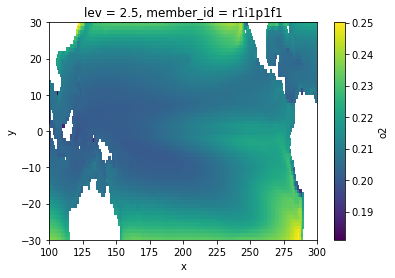

In [32]:
dset_dict_processed1['CMIP.NOAA-GFDL.GFDL-ESM4.piControl.Oyr.gr'].isel(lev=0).mean("time").sel(x=slice(100, 300), y=slice(-30, 30)).o2.plot()